In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600~/.kaggle/kaggle.json

chmod: missing operand after ‘600~/.kaggle/kaggle.json’
Try 'chmod --help' for more information.


1. Load the dataset


In [ ]:
!kaggle datasets download -d abcsds/pokemon
!unzip pokemon.zip

  0% 0.00/14.9k [00:00<?, ?B/s]
100% 14.9k/14.9k [00:00<00:00, 10.3MB/s]
Archive:  pokemon.zip
  inflating: Pokemon.csv             


In [ ]:
import pandas as pd

original_df = pd.read_csv('Pokemon.csv')
original_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


2. Select features

In [ ]:
modified_df = original_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
modified_df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


3. Split into 3 partitions: Train, Val & Test

In [ ]:
shuffled_df = modified_df.sample(frac=1)
shuffled_df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
559,110,123,65,100,65,65
794,108,100,121,81,95,95
10,59,63,80,65,80,58
659,74,94,131,54,116,20
413,80,145,150,105,110,110


In [ ]:
from tables.group import TransactionG
train_df = shuffled_df[:500]
val_df = shuffled_df[500:650]
test_df = shuffled_df[650:]

len(train_df), len(val_df), len(test_df)

(500, 150, 150)

In [ ]:
X_train, y_train = train_df.to_numpy()[:, :-1], train_df.to_numpy()[:, -1]
X_val, y_val = val_df.to_numpy()[:, :-1], val_df.to_numpy()[:, -1]
X_test, y_test = test_df.to_numpy()[:, :-1], test_df.to_numpy()[:, -1]

(X_train.shape, y_train.shape), (X_val.shape, y_val.shape), (X_test.shape, y_test.shape)

# Ens dona quantes (files, columnes) te cada shape

(((500, 5), (500,)), ((150, 5), (150,)), ((150, 5), (150,)))

4. Preprocess the inputs

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>, <AxesSubplot:>]], dtype=object)

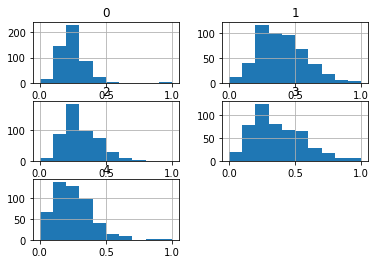

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)

X_train_scaled, X_val_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_val), scaler.transform(X_test)

pd.DataFrame(X_train_scaled).hist()

5. Pick the best model w/ lowest validation error

In [ ]:
from sklearn.metrics import mean_absolute_error

average_speed = y_train.mean()

mean_absolute_error(y_val, [average_speed]*len(y_val))


22.66112

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(X_train, y_train)

mean_absolute_error(y_val, linear_model.predict(X_val))

17.915843060903303

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor().fit(X_train, y_train)

mean_absolute_error(y_val, random_forest.predict(X_val))

18.285974126984126

In [ ]:
# fer el model amb neuronal networks o deep learning

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam

model_1 = Sequential([layers.Input((5,)),
                      layers.Dense(1)])

model_1.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mean_absolute_error'])

model_1.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 24ms/step - loss: 5470.1240 - mean_absolute_error: 60.8827 - val_loss: 3181.6758 - val_mean_absolute_error: 42.1478
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 1723.1058 - mean_absolute_error: 32.6623 - val_loss: 1903.9183 - val_mean_absolute_error: 32.8377
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 1520.2562 - mean_absolute_error: 30.8467 - val_loss: 1848.0089 - val_mean_absolute_error: 32.5149
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 1433.6261 - mean_absolute_error: 29.9828 - val_loss: 1781.2075 - val_mean_absolute_error: 31.7354
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 1357.4224 - mean_absolute_error: 29.1481 - val_loss: 1707.2340 - val_mean_absolute_error: 31.1460
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 1294.4604 - mean_absolute_error: 28.5451 - val_loss: 1625.5481 - val_me

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam

model_2 = Sequential([layers.Input((5,)),
                      layers.Dense(32),
                      layers.Dense(32),
                      layers.Dense(1)])

model_2.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mean_absolute_error'])

model_2.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 16ms/step - loss: 2888.6611 - mean_absolute_error: 41.4817 - val_loss: 852.5414 - val_mean_absolute_error: 23.2755
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 806.6719 - mean_absolute_error: 22.6661 - val_loss: 669.3750 - val_mean_absolute_error: 20.3254
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 662.5271 - mean_absolute_error: 20.5399 - val_loss: 664.3661 - val_mean_absolute_error: 19.8779
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 664.8396 - mean_absolute_error: 20.6356 - val_loss: 687.6309 - val_mean_absolute_error: 20.7687
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 668.2023 - mean_absolute_error: 20.7631 - val_loss: 694.5010 - val_mean_absolute_error: 20.7877
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 671.5929 - mean_absolute_error: 20.6764 - val_loss: 663.2570 - val_mean_absolute

In [ ]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                192       
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


6. Evaluate the chosen model

In [ ]:
# Escollim regressió lineal ja que és la millor 
# (si fos molt poc pitjor que les altres tambe l'escolliriem ja que es mes facil d'interpretar)

mean_absolute_error(y_test, linear_model.predict(X_test))


19.08714434236981

In [ ]:
import numpy as np
input_data = (80,82,83,100,100)
scaler = MinMaxScaler()

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshaped)

[[ 80  82  83 100 100]]


In [ ]:
prediction = linear_model.predict(input_data_reshaped)
print(prediction)

[79.39148736]
